In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/placement-sample/placement_dataset_sample.csv')
print(df)



   cgpa  placement_exam_marks  placed
0  6.56                  60.0       0
1  7.89                  39.0       1
2  6.77                  75.0       1
3  6.53                  46.0       0
4  6.23                  31.0       0


In [5]:
df.shape

(5, 3)

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
3,6.53,46.0,0
2,6.77,75.0,1
1,7.89,39.0,1
0,6.56,60.0,0
4,6.23,31.0,0


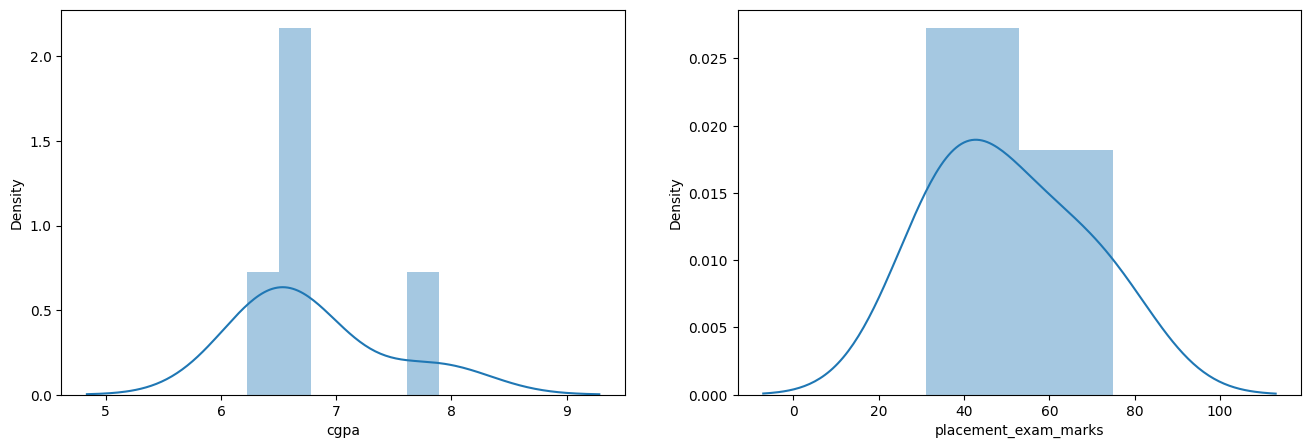

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

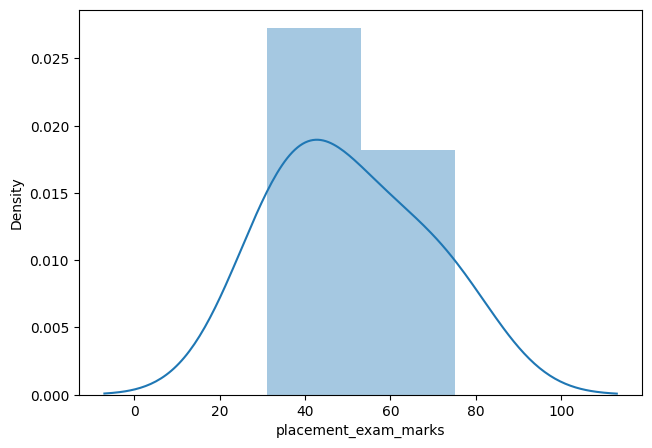

In [8]:
plt.figure(figsize=(16,5))
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

Mean value of cgpa: 6.796000000000001
Std value of cgpa: 0.6411552074186091
Min value of cgpa: 6.23
Max value of cgpa: 7.89


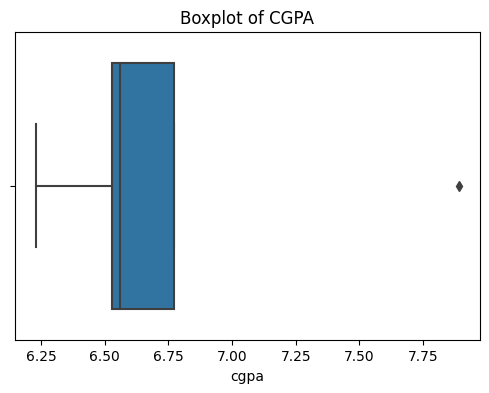

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean value of cgpa:", df['cgpa'].mean())
print("Std value of cgpa:", df['cgpa'].std())
print("Min value of cgpa:", df['cgpa'].min())
print("Max value of cgpa:", df['cgpa'].max())

plt.figure(figsize=(6, 4))
sns.boxplot(x='cgpa', data=df)
plt.title('Boxplot of CGPA')
plt.show()


<Axes: >

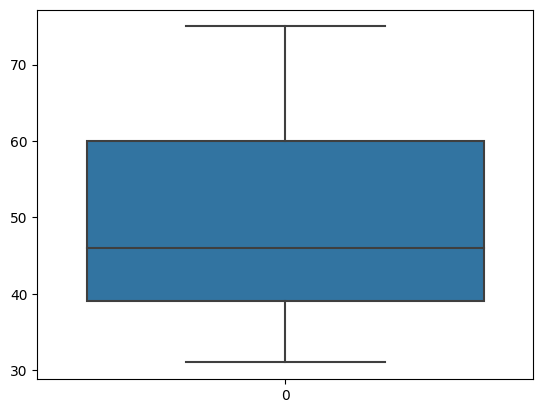

In [13]:
sns.boxplot(df['placement_exam_marks'])


In [15]:
print("Highest allowed:", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("Lowest allowed:", df['cgpa'].mean() - 3 * df['cgpa'].std())


Highest allowed: 8.719465622255829
Lowest allowed: 4.872534377744174


In [16]:
df[(df['cgpa']>6.23)| (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
0,6.56,60.0,0
1,7.89,39.0,1
2,6.77,75.0,1
3,6.53,46.0,0


In [18]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
df.head()


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,6.56,60.0,0,-0.368086
1,7.89,39.0,1,1.706295
2,6.77,75.0,1,-0.040552
3,6.53,46.0,0,-0.414876
4,6.23,31.0,0,-0.882782


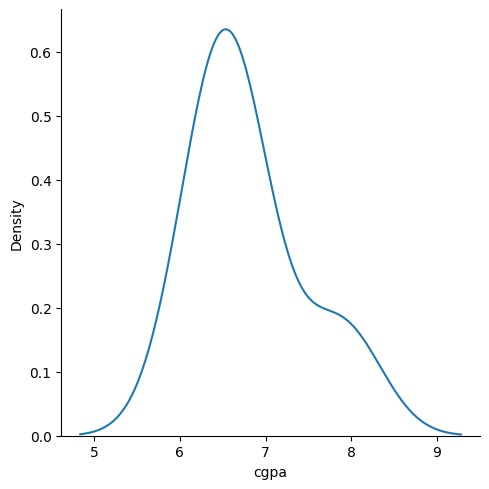

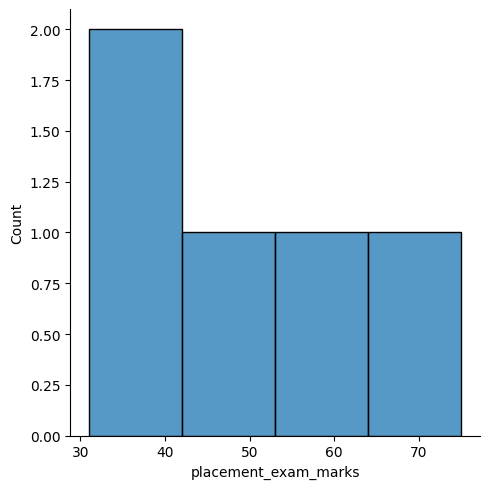

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['cgpa'], kind='kde')

sns.displot(df['placement_exam_marks'], kind='hist')

plt.show()


In [22]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

print("25th Percentile:", percentile25)
print("75th Percentile:", percentile75)

iqr = percentile75 - percentile25
print("IQR:", iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr  # You had + by mistake

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)


25th Percentile: 39.0
75th Percentile: 60.0
IQR: 21.0
Upper Limit: 91.5
Lower Limit: 7.5


In [23]:
outliers = df[df['placement_exam_marks'] > upper_limit]
print("Outliers above upper limit:")
print(outliers)

above_lower = df[df['placement_exam_marks'] > lower_limit]
print("\nRows above lower limit:")
print(above_lower)


Outliers above upper limit:
Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed, cgpa_zscore]
Index: []

Rows above lower limit:
   cgpa  placement_exam_marks  placed  cgpa_zscore
0  6.56                  60.0       0    -0.368086
1  7.89                  39.0       1     1.706295
2  6.77                  75.0       1    -0.040552
3  6.53                  46.0       0    -0.414876
4  6.23                  31.0       0    -0.882782


(5, 4)


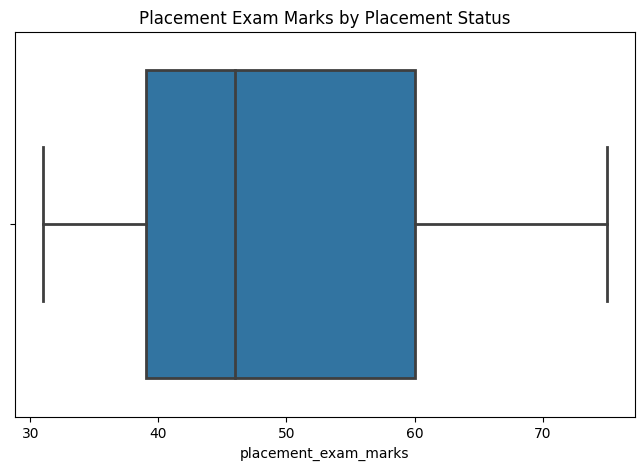

In [25]:
new_df = df[df['placement_exam_marks'] < upper_limit]

print(new_df.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='placement_exam_marks', data=new_df, hue='placed', linewidth=2)
plt.title("Placement Exam Marks by Placement Status")
plt.show()

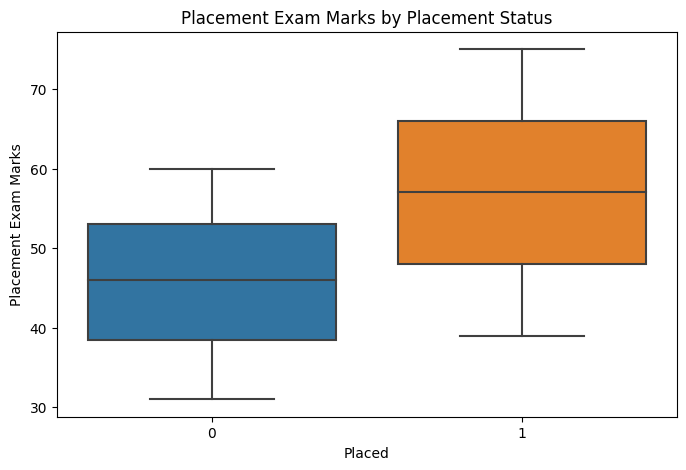

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='placed', y='placement_exam_marks', data=new_df)
plt.title("Placement Exam Marks by Placement Status")
plt.xlabel("Placed")
plt.ylabel("Placement Exam Marks")
plt.show()


In [28]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)
print(new_df_cap.shape)


(5, 4)
